In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tifffile

ROOT = Path("..").resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

from src.roi_analysis import (
    compute_centroids_df,
    compute_neighbor_stats,
    get_pixel_size,
    get_stub,
    load_segmentation,
    run_batch,
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
DATAFOLDER = Path("D:/TestData/fenestrations")
files = ["FAS_24_ME_09.tif", "FAS_24_ME_10.tif", "FAS_24_ME_11.tif"]

stubs = [get_stub(file) for file in files]
OUTFILE = DATAFOLDER / "roi_neighbor_results.pkl"

In [4]:
all_rois_df, all_summary_df = run_batch(DATAFOLDER, stubs, max_k=10)

all_rois_df.head()
# all_summary_df

stub  roi_id  centroid_x  centroid_y  pixel_count  pixel_size  \
0  FAS_24_ME_09       1  376.087302    5.523810          126       3.769   
1  FAS_24_ME_09       2  457.544379    6.727811          169       3.769   
2  FAS_24_ME_09       3  642.121951    4.353659           82       3.769   
3  FAS_24_ME_09       4  842.719298    2.964912           57       3.769   
4  FAS_24_ME_09       5  899.817391    5.017391          115       3.769   

          area  cluster_neighbor_count  \
0  1789.875486                      10   
1  2400.706009                      10   
2  1164.839602                      10   
3   809.705577                      10   
4  1633.616515                      10   

                       cluster_neighbor_ids  cluster_max_internal_angle_deg  \
0  [50, 21, 41, 67, 63, 40, 76, 71, 46, 13]                      134.819276   
1  [19, 14, 37, 56, 83, 86, 50, 85, 41, 21]                      154.263126   
2   [7, 28, 64, 36, 78, 91, 55, 24, 73, 23]                      138.144473   
3    [8, 5, 62, 32, 53, 77, 57, 29, 42, 15]                      160.755563   
4    [4, 9, 20, 39, 30, 75, 82, 54, 62, 32]                      138.029061   

   ...  major_axis_angle  major_axis_extent  minor_axis_extent  \
0  ...              30.0           6.946152           5.647114   
1  ...              25.0           8.276472           6.494392   
2  ...              27.0           5.590009           4.253499   
3  ...              11.0           5.098945           3.231095   
4  ...              18.0           6.324373           5.527825   

   major_axis_length_px  minor_axis_length_px step_major step_minor  \
0             55.569219             45.176915   0.217919   0.177164   
1             66.211779             51.955139   0.259654   0.203746   
2             44.720071             34.027993   0.175373   0.133443   
3             40.791559             25.848760   0.159967   0.101368   
4             50.594985             44.222601   0.198412   0.173422   

  step_diag45 step_diag135 diameter_area  
0    0.186969     0.194001     47.738247  
1    0.230534     0.211729     55.287194  
2    0.148809     0.158880     38.511295  
3    0.122191     0.147588     32.108397  
4    0.169050     0.189349     45.606854  

[5 rows x 30 columns]

In [5]:
all_rois_df.columns

Index(['stub', 'roi_id', 'centroid_x', 'centroid_y', 'pixel_count',
       'pixel_size', 'area', 'cluster_neighbor_count', 'cluster_neighbor_ids',
       'cluster_max_internal_angle_deg', 'cluster_max_angular_gap_deg',
       'cluster_is_convex', 'cluster_center_inside_polygon',
       'cluster_is_valid', 'cluster_neighbor_distance', 'profile_major',
       'profile_minor', 'profile_diag45', 'profile_diag135', 'four_axis_mean',
       'major_axis_angle', 'major_axis_extent', 'minor_axis_extent',
       'major_axis_length_px', 'minor_axis_length_px', 'step_major',
       'step_minor', 'step_diag45', 'step_diag135', 'diameter_area'],
      dtype='str')

In [6]:
all_summary_df

stub  mean_neighbor_count  mean_cluster_neighbor_distance_px  \
0  FAS_24_ME_09             5.873418                          31.347343   
1  FAS_24_ME_10             5.761745                          32.188392   
2  FAS_24_ME_11             5.638329                          29.386765   

   mean_cluster_neighbor_distance_nm  mean_roi_area_nm2  \
0                         118.148135        1804.696145   
1                         117.584195        1485.558333   
2                         108.495936        2378.668681   

   mean_pixel_size_nm_per_px  mean_diameter_area_nm  mean_diameter_major_nm  \
0                      3.769              47.639979              108.440647   
1                      3.653              43.149766              109.408029   
2                      3.692              54.404026              104.334818   

   mean_diameter_minor_nm  mean_diameter_four_axis_nm  \
0               98.026320                  110.757716   
1               94.522570                   96.478164   
2               84.973943                   96.163887   

                            mean_profile_major_smpls  \
0  [68.46892655367232, 68.46516007532956, 68.2806...   
1  [99.90267983074753, 100.20451339915374, 100.33...   
2  [134.14598540145985, 134.28345498783455, 134.4...   

                            mean_profile_minor_smpls  \
0  [75.98305084745763, 76.18267419962335, 76.3973...   
1  [109.79125528913963, 110.0, 110.00282087447108...   
2  [140.32116788321167, 140.34549878345499, 140.3...   

                                mean_four_axis_smpls  porosity_square  \
0  [71.43502824858757, 71.51271186440678, 71.6040...         0.129286   
1  [104.35437235543019, 104.53772919605078, 104.6...         0.107446   
2  [136.4273114355231, 136.49756690997566, 136.53...         0.202072   

   porosity_hex  porosity_blend  blend_weight  
0      0.149286        0.147839      0.936709  
1      0.124068        0.121823      0.880872  
2      0.233333        0.226983      0.819164

In [28]:
with open(OUTFILE, "wb") as f:
    pickle.dump({"rois": all_rois_df, "summary": all_summary_df}, f)

OUTFILE

WindowsPath('D:/TestData/fenestrations/roi_neighbor_results.pkl')

In [29]:
all_rois_df

stub  roi_id  centroid_x  centroid_y  pixel_count  pixel_size  \
0     FAS_24_ME_09       1  376.087302    5.523810          126       3.769   
1     FAS_24_ME_09       2  457.544379    6.727811          169       3.769   
2     FAS_24_ME_09       3  642.121951    4.353659           82       3.769   
3     FAS_24_ME_09       4  842.719298    2.964912           57       3.769   
4     FAS_24_ME_09       5  899.817391    5.017391          115       3.769   
...            ...     ...         ...         ...          ...         ...   
2057  FAS_24_ME_11     818  267.291925  685.813665          161       3.692   
2058  FAS_24_ME_11     819  355.094203  686.652174          138       3.692   
2059  FAS_24_ME_11     820  942.114943  685.850575           87       3.692   
2060  FAS_24_ME_11     821  769.762500  686.987500           80       3.692   
2061  FAS_24_ME_11     822  542.988764  687.269663           89       3.692   

             area  neighbor_count  mean_neighbor_distance  \
0     1789.875486               2               29.104892   
1     2400.706009               1               21.867541   
2     1164.839602               1               23.147891   
3      809.705577               2               28.269413   
4     1633.616515               1               24.979617   
...           ...             ...                     ...   
2057  2194.569104               3               28.058795   
2058  1881.059232               4               32.767429   
2059  1185.885168               4               26.374380   
2060  1090.469120               3               20.935037   
2061  1213.146896               3               23.764474   

                                              profile_h  ...  \
0     [66, 72, 78, 83, 85, 87, 89, 84, 79, 74, 75, 7...  ...   
1     [69, 68, 68, 69, 73, 77, 78, 75, 72, 66, 60, 5...  ...   
2     [108, 106, 104, 102, 105, 107, 110, 113, 117, ...  ...   
3     [94, 91, 89, 87, 85, 88, 93, 98, 99, 95, 91, 8...  ...   
4     [104, 104, 100, 97, 93, 89, 85, 81, 75, 69, 63...  ...   
...                                                 ...  ...   
2057  [113, 120, 124, 128, 131, 135, 134, 128, 121, ...  ...   
2058  [111, 105, 112, 118, 123, 125, 127, 138, 149, ...  ...   
2059  [166, 165, 164, 162, 158, 154, 152, 154, 157, ...  ...   
2060  [185, 172, 158, 159, 164, 168, 165, 161, 156, ...  ...   
2061  [135, 135, 135, 135, 135, 136, 136, 133, 131, ...  ...   

                                            profile_d45  \
0     [66, 64, 63, 62, 63, 64, 69, 78, 88, 88, 84, 8...   
1     [66, 67, 76, 86, 93, 99, 105, 104, 103, 94, 80...   
2     [87, 83, 79, 76, 74, 75, 87, 99, 109, 116, 122...   
3     [112, 112, 111, 110, 109, 109, 108, 107, 104, ...   
4     [106, 99, 91, 85, 79, 73, 72, 77, 82, 80, 76, ...   
...                                                 ...   
2057  [148, 142, 147, 145, 127, 125, 135, 133, 124, ...   
2058  [92, 95, 105, 107, 106, 123, 129, 117, 113, 12...   
2059  [92, 93, 96, 100, 104, 111, 113, 99, 83, 74, 8...   
2060  [126, 110, 108, 117, 128, 122, 115, 114, 116, ...   
2061  [108, 115, 113, 107, 107, 106, 102, 96, 94, 97...   

                                           profile_d135  \
0     [75, 68, 61, 63, 65, 68, 75, 86, 84, 73, 72, 8...   
1     [88, 103, 93, 89, 92, 76, 73, 74, 80, 82, 69, ...   
2     [53, 50, 54, 64, 70, 70, 66, 67, 75, 91, 98, 9...   
3     [77, 75, 73, 71, 71, 77, 86, 88, 92, 99, 99, 9...   
4     [99, 103, 108, 108, 103, 96, 89, 88, 90, 86, 7...   
...                                                 ...   
2057  [56, 63, 127, 21, 85, 190, 255, 255, 255, 255,...   
2058  [203, 255, 255, 255, 255, 255, 255, 255, 255, ...   
2059  [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...   
2060  [255, 255, 255, 255, 255, 255, 255, 255, 255, ...   
2061  [113, 218, 255, 255, 255, 220, 158, 168, 247, ...   

                                           profile_mean profile_length_h  \
0     [60.5, 59.75, 59.25, 60.75, 62.0, 63.5, 67.0, ...              

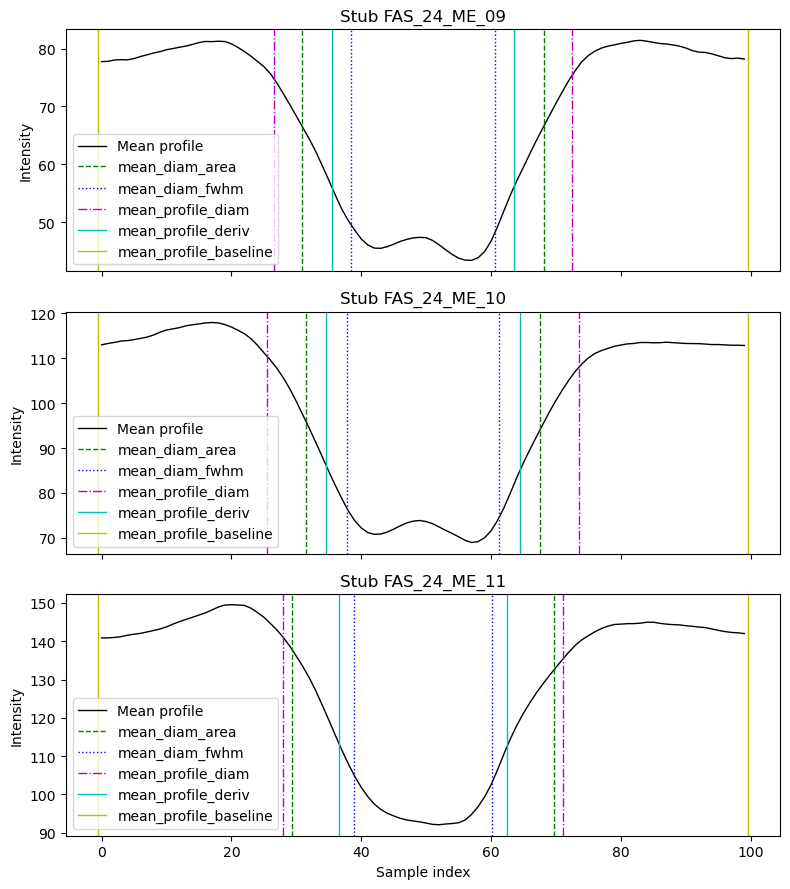

In [40]:
# Visualize mean profile and diameter estimates per stub
rows = all_summary_df.dropna(subset=["mean_profile"]).copy()
if rows.empty:
    raise ValueError("No mean profiles available in summary")

nrows = len(rows)
fig, axes = plt.subplots(nrows, 1, figsize=(8, 3 * nrows), sharex=True)
if nrows == 1:
    axes = [axes]

for ax, (_, row) in zip(axes, rows.iterrows()):
    profile = row["mean_profile"]
    if profile is None:
        continue

    x = np.arange(len(profile))
    center = (len(profile) - 1) / 2

    ax.plot(profile, color="k", linewidth=1, label="Mean profile")

    step_px = row.get("mean_profile_step")
    px_size = row.get("mean_pixel_size")

    if pd.notna(step_px) and pd.notna(px_size):
        if pd.notna(row.get("mean_diameter_area")):
            half = (row["mean_diameter_area"] / (step_px * px_size)) / 2
            ax.axvline(center - half, color="g", linestyle="--", linewidth=1, label="mean_diam_area")
            ax.axvline(center + half, color="g", linestyle="--", linewidth=1)

        if pd.notna(row.get("mean_diameter_fwhm")):
            half = (row["mean_diameter_fwhm"] / (step_px * px_size)) / 2
            ax.axvline(center - half, color="b", linestyle=":", linewidth=1, label="mean_diam_fwhm")
            ax.axvline(center + half, color="b", linestyle=":", linewidth=1)

        if pd.notna(row.get("mean_profile_diameter")):
            half = (row["mean_profile_diameter"] / (step_px * px_size)) / 2
            ax.axvline(center - half, color="m", linestyle="-.", linewidth=1, label="mean_profile_diam")
            ax.axvline(center + half, color="m", linestyle="-.", linewidth=1)

        if pd.notna(row.get("mean_profile_diameter_deriv")):
            half = (row["mean_profile_diameter_deriv"] / (step_px * px_size)) / 2
            ax.axvline(center - half, color="c", linestyle="-", linewidth=1, label="mean_profile_deriv")
            ax.axvline(center + half, color="c", linestyle="-", linewidth=1)

        if pd.notna(row.get("mean_profile_diameter_baseline")):
            half = (row["mean_profile_diameter_baseline"] / (step_px * px_size)) / 2
            ax.axvline(center - half, color="y", linestyle="-", linewidth=1, label="mean_profile_baseline")
            ax.axvline(center + half, color="y", linestyle="-", linewidth=1)

    ax.set_title(f"Stub {row['stub']}")
    ax.set_ylabel("Intensity")
    ax.legend(loc="best")

axes[-1].set_xlabel("Sample index")
plt.tight_layout()
plt.show()

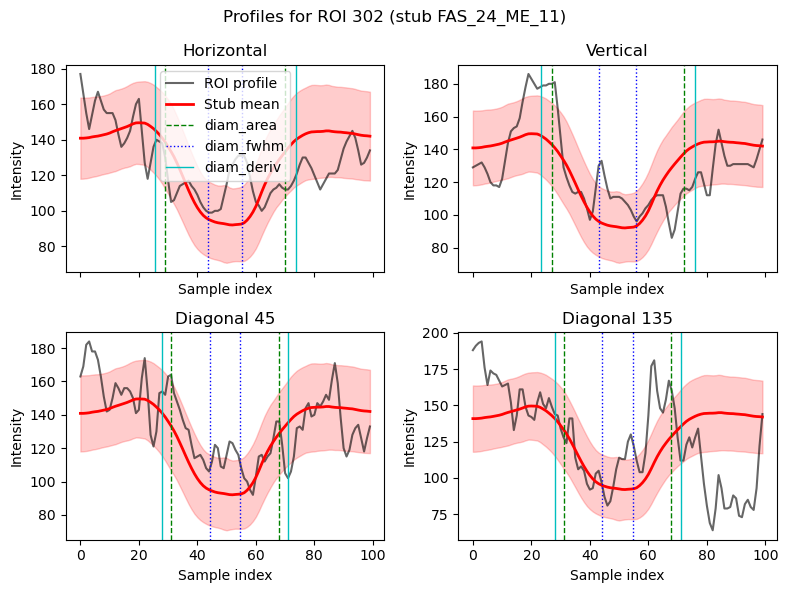

In [9]:
# Visualize profiles for a selected ROI (with global mean for the stub)
profile_stub = stubs[2]

rois_stub = all_rois_df[all_rois_df["stub"] == profile_stub].copy()
if rois_stub.empty:
    raise ValueError(f"No ROIs found for stub {profile_stub}")

roi_id = int(rois_stub["roi_id"].iloc[301])  # change this to any ROI id
roi_row = rois_stub[rois_stub["roi_id"] == roi_id].iloc[0]

payload, masks = load_segmentation(DATAFOLDER, profile_stub)

profiles = {
    "Horizontal": roi_row["profile_h"],
    "Vertical": roi_row["profile_v"],
    "Diagonal 45": roi_row["profile_d45"],
    "Diagonal 135": roi_row["profile_d135"],
}

mean_profiles = [p for p in rois_stub["profile_mean"] if p is not None]
if mean_profiles:
    global_mean = np.mean(np.vstack(mean_profiles), axis=0)
    global_std = np.std(np.vstack(mean_profiles), axis=0)
else:
    global_mean = None
    global_std = None

single_mask = masks == roi_id
ys, xs = np.nonzero(single_mask)
if ys.size == 0 or xs.size == 0:
    raise ValueError(f"ROI id {roi_id} has no pixels")

x_min, x_max = xs.min(), xs.max()
y_min, y_max = ys.min(), ys.max()
mask_width = x_max - x_min
mask_height = y_max - y_min

margin_pixels = 10
num_samples = len(next(p for p in profiles.values() if p is not None))

length_h = mask_width + 2 * margin_pixels
length_v = mask_height + 2 * margin_pixels
length_d = np.sqrt(mask_width ** 2 + mask_height ** 2) + 2 * margin_pixels

step_h = length_h / (num_samples - 1)
step_v = length_v / (num_samples - 1)
step_d = length_d / (num_samples - 1)

pixel_size = float(roi_row["pixel_size"])
diam_area_px = float(roi_row["diameter_area"]) / pixel_size

diam_fwhm = roi_row.get("diameter_fwhm")
diam_fwhm_px = float(diam_fwhm) / pixel_size if pd.notna(diam_fwhm) else np.nan

diam_deriv = roi_row.get("diameter_deriv")
diam_deriv_px = float(diam_deriv) / pixel_size if pd.notna(diam_deriv) else np.nan

diam_baseline = roi_row.get("diameter_baseline")
diam_baseline_px = float(diam_baseline) / pixel_size if pd.notna(diam_baseline) else np.nan

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True)
axes = axes.ravel()

for ax, (name, profile) in zip(axes, profiles.items()):
    if profile is None:
        ax.set_title(f"{name} (missing)")
        ax.axis("off")
        continue

    if name == "Horizontal":
        step = step_h
    elif name == "Vertical":
        step = step_v
    else:
        step = step_d

    x = np.arange(len(profile))
    center = (len(profile) - 1) / 2

    ax.plot(profile, color="k", alpha=0.6, label="ROI profile")
    if global_mean is not None:
        ax.plot(global_mean, color="r", linewidth=2, label="Stub mean")
        ax.fill_between(x, global_mean - global_std, global_mean + global_std, color="r", alpha=0.2)

    if np.isfinite(diam_area_px):
        half = (diam_area_px / 2) / step
        ax.axvline(center - half, color="g", linestyle="--", linewidth=1, label="diam_area")
        ax.axvline(center + half, color="g", linestyle="--", linewidth=1)

    if np.isfinite(diam_fwhm_px):
        half = (diam_fwhm_px / 2) / step
        ax.axvline(center - half, color="b", linestyle=":", linewidth=1, label="diam_fwhm")
        ax.axvline(center + half, color="b", linestyle=":", linewidth=1)

    if np.isfinite(diam_deriv_px):
        half = (diam_deriv_px / 2) / step
        ax.axvline(center - half, color="c", linestyle="-", linewidth=1, label="diam_deriv")
        ax.axvline(center + half, color="c", linestyle="-", linewidth=1)

    if np.isfinite(diam_baseline_px):
        half = (diam_baseline_px / 2) / step
        ax.axvline(center - half, color="y", linestyle="-", linewidth=1, label="diam_baseline")
        ax.axvline(center + half, color="y", linestyle="-", linewidth=1)

    ax.set_title(name)

fig.suptitle(f"Profiles for ROI {roi_id} (stub {profile_stub})", y=0.98)
for ax in axes:
    ax.set_xlabel("Sample index")
    ax.set_ylabel("Intensity")

axes[0].legend(loc="best")
plt.tight_layout()
plt.show()

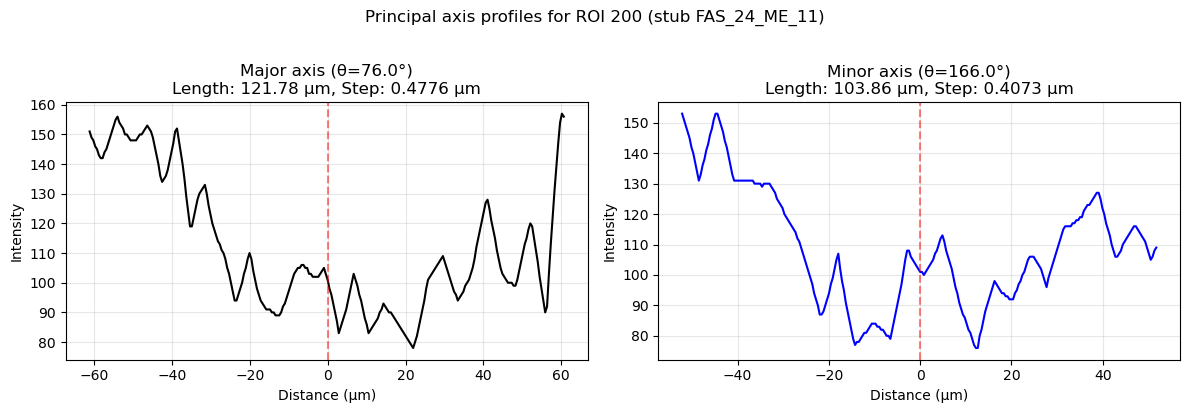


ROI 200 axes:
  Major angle: 76.00°
  Major extent (half): 8.25 px = 30.4450 µm
  Minor extent (half): 7.03 px = 25.9647 µm
  Major axis extents with 50% extension: ±16.49 px
  Minor axis extents with 50% extension: ±14.07 px
  Aspect ratio (major/minor): 1.17


In [47]:
# Profiles using principal axes (major + minor at 90 degrees, 50% extension)
from src.roi_analysis import compute_profiles_from_principal_axes

profile_stub = stubs[2]  # change this to any stub
roi_id = 200  # change this to any ROI id

# Load data
payload, masks = load_segmentation(DATAFOLDER, profile_stub)
pixel_size = get_pixel_size(DATAFOLDER, profile_stub)
raw = tifffile.imread(DATAFOLDER / f"{profile_stub}.tif")
image = raw[0] if raw.ndim > 2 else raw

# Get ROI
roi_index = (all_rois_df["stub"] == profile_stub) & (all_rois_df["roi_id"] == roi_id)
if not roi_index.any():
    print(f"ROI {roi_id} not found in stub {profile_stub}")
else:
    roi_row = all_rois_df[roi_index].iloc[0]
    roi_mask = masks == roi_id
    centroid_x = roi_row["centroid_x"]
    centroid_y = roi_row["centroid_y"]
    
    # Compute principal axis profiles with 50% extension
    num_samples = 256
    result = compute_profiles_from_principal_axes(
        roi_mask=roi_mask,
        image=image,
        centroid_x=centroid_x,
        centroid_y=centroid_y,
        pixel_size=pixel_size,
        num_samples=num_samples,
        extension_factor=0.50,
    )
    
    if result["success"]:
        profile_major = result["profile_major"]
        profile_minor = result["profile_minor"]
        major_angle = result["major_angle"]
        major_extent = result["major_extent"]
        minor_extent = result["minor_extent"]
        step_major = result["step_major"]
        step_minor = result["step_minor"]
        major_length_px = result["major_length_px"]
        minor_length_px = result["minor_length_px"]
        
        # Convert to physical units
        major_length_phys = major_length_px * pixel_size
        minor_length_phys = minor_length_px * pixel_size
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Major axis profile
        x_major = np.arange(num_samples) * step_major * pixel_size
        x_major = x_major - x_major[len(x_major) // 2]  # center at zero
        axes[0].plot(x_major, profile_major, color="k", linewidth=1.5)
        axes[0].axvline(0, color="r", linestyle="--", alpha=0.5)
        axes[0].set_xlabel(f"Distance (µm)")
        axes[0].set_ylabel("Intensity")
        axes[0].set_title(f"Major axis (θ={major_angle:.1f}°)\nLength: {major_length_phys:.2f} µm, Step: {step_major*pixel_size:.4f} µm")
        axes[0].grid(True, alpha=0.3)
        
        # Minor axis profile
        x_minor = np.arange(num_samples) * step_minor * pixel_size
        x_minor = x_minor - x_minor[len(x_minor) // 2]  # center at zero
        axes[1].plot(x_minor, profile_minor, color="b", linewidth=1.5)
        axes[1].axvline(0, color="r", linestyle="--", alpha=0.5)
        axes[1].set_xlabel(f"Distance (µm)")
        axes[1].set_ylabel("Intensity")
        axes[1].set_title(f"Minor axis (θ={(major_angle+90)%180:.1f}°)\nLength: {minor_length_phys:.2f} µm, Step: {step_minor*pixel_size:.4f} µm")
        axes[1].grid(True, alpha=0.3)
        
        fig.suptitle(f"Principal axis profiles for ROI {roi_id} (stub {profile_stub})", y=1.02)
        plt.tight_layout()
        plt.show()
        
        print(f"\nROI {roi_id} axes:")
        print(f"  Major angle: {major_angle:.2f}°")
        print(f"  Major extent (half): {major_extent:.2f} px = {major_extent*pixel_size:.4f} µm")
        print(f"  Minor extent (half): {minor_extent:.2f} px = {minor_extent*pixel_size:.4f} µm")
        print(f"  Major axis extents with 50% extension: ±{major_length_px/2:.2f} px")
        print(f"  Minor axis extents with 50% extension: ±{minor_length_px/2:.2f} px")
        print(f"  Aspect ratio (major/minor): {major_extent/minor_extent:.2f}")
    else:
        print(f"Could not compute profiles for ROI {roi_id} (insufficient pixels)")


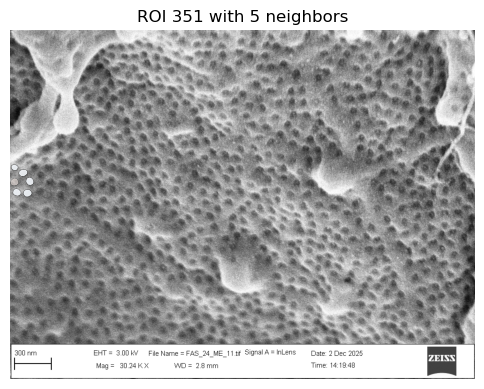

In [9]:
# Visualize one ROI and its nearest neighbors over the original image
viz_stub = stubs[2]  # change this to any stub

payload, masks = load_segmentation(DATAFOLDER, viz_stub)
pixel_size = get_pixel_size(DATAFOLDER, viz_stub)
centroids_df = compute_centroids_df(masks, pixel_size, stub=viz_stub)
centroids_df, dists = compute_neighbor_stats(centroids_df, max_k=10)

roi_id = int(centroids_df["roi_id"].iloc[350])  # change this to any ROI id

coords = centroids_df[["centroid_x", "centroid_y"]].to_numpy()
roi_ids_all = centroids_df["roi_id"].to_numpy()

roi_index = np.where(roi_ids_all == roi_id)[0]
if roi_index.size == 0:
    raise ValueError(f"ROI id {roi_id} not found")
roi_index = roi_index[0]

dist_row = dists[roi_index]

# Get the nearest neighbors for this ROI
order = np.argsort(dist_row)
order = order[order != roi_index]

n = int(centroids_df.loc[roi_index, "neighbor_count"])
neighbor_indices = order[:n]

# Build a label mask for display
mask_main = (masks == roi_id)
mask_neighbors = np.isin(masks, roi_ids_all[neighbor_indices])

# Read the original image and pick a 2D plane if needed
raw = tifffile.imread(DATAFOLDER / f"{viz_stub}.tif")
image = raw[0] if raw.ndim > 2 else raw

# Mask background so only ROI pixels are drawn
neighbors_masked = np.ma.masked_where(~mask_neighbors, mask_neighbors)
main_masked = np.ma.masked_where(~mask_main, mask_main)

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap="gray")
plt.imshow(neighbors_masked, cmap="Blues", alpha=0.9)
plt.imshow(main_masked, cmap="Reds", alpha=0.6)
plt.title(f"ROI {roi_id} with {n} neighbors")
plt.axis("off")
plt.show()

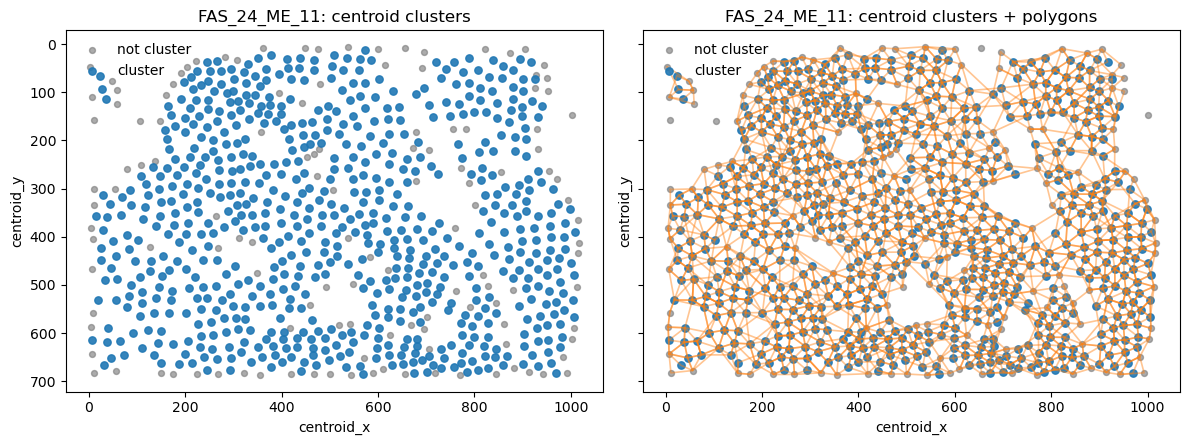

In [27]:
# Quick QC: side-by-side cluster views for one stub
from src.roi_analysis import compute_polygon_cluster_stats, plot_cluster_centroids, plot_cluster_polygons

qc_stub = stubs[2]  # change stub as needed
qc_df = all_rois_df[all_rois_df["stub"] == qc_stub].copy()

if qc_df.empty:
    raise ValueError(f"No rows found for stub {qc_stub}")

if "cluster_is_valid" not in qc_df.columns:
    qc_df = compute_polygon_cluster_stats(qc_df, max_neighbors=10)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
plot_cluster_centroids(qc_df, ax=axes[0])
plot_cluster_polygons(qc_df, ax=axes[1])
axes[0].set_title(f"{qc_stub}: centroid clusters")
axes[1].set_title(f"{qc_stub}: centroid clusters + polygons")
ymin, ymax = axes[0].get_ylim()
for axis in axes:
    axis.set_ylim([ymax, ymin])
plt.tight_layout()
plt.show()

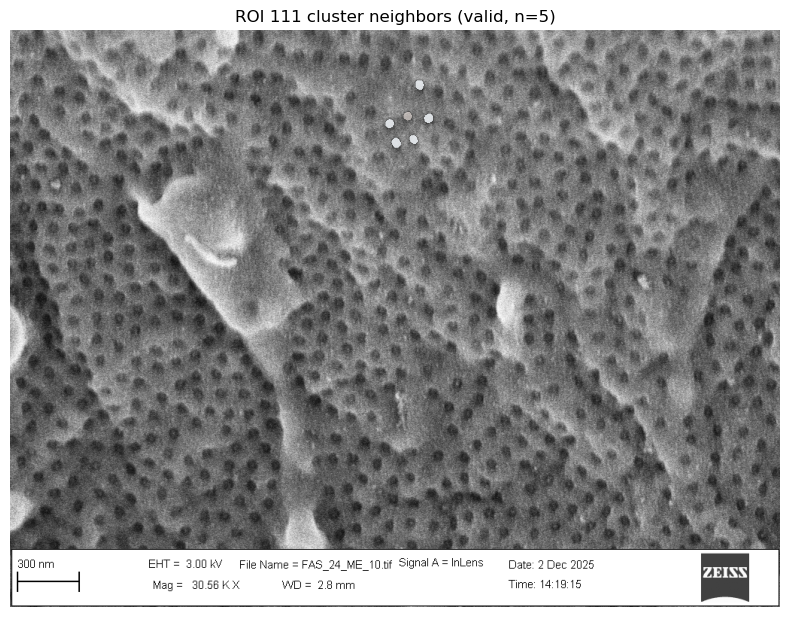

In [33]:
from src.roi_analysis import plot_roi_neighbor_comparison

compare_stub = stubs[1]
compare_roi_id = None  # set int roi_id to force a specific ROI
compare_random_seed = None  # set int for reproducible random ROI; None uses time

payload, masks = load_segmentation(DATAFOLDER, compare_stub)
raw = tifffile.imread(DATAFOLDER / f"{compare_stub}.tif")
image = raw[0] if raw.ndim > 2 else raw

compare_df = all_rois_df[all_rois_df["stub"] == compare_stub].copy()
if compare_df.empty:
    raise ValueError(f"No ROIs found for stub {compare_stub}")

fig, ax = plot_roi_neighbor_comparison(
    image=image,
    masks=masks,
    centroids_df=compare_df,
    roi_id=compare_roi_id,
    max_neighbors=10,
    figsize=(8, 8),
    random_seed=compare_random_seed,
)
plt.show()

In [18]:
all_rois_df.columns

Index(['stub', 'roi_id', 'centroid_x', 'centroid_y', 'pixel_count',
       'pixel_size', 'area', 'neighbor_count', 'mean_neighbor_distance',
       'cluster_neighbor_count', 'cluster_neighbor_ids',
       'cluster_max_internal_angle_deg', 'cluster_max_angular_gap_deg',
       'cluster_is_convex', 'cluster_center_inside_polygon',
       'cluster_is_valid', 'profile_h', 'profile_v', 'profile_d45',
       'profile_d135', 'profile_mean', 'profile_length_h', 'profile_length_v',
       'profile_length_d', 'diameter_fwhm', 'diameter_deriv', 'profile_mad',
       'diameter_area'],
      dtype='object')

<Axes: ylabel='Frequency'>

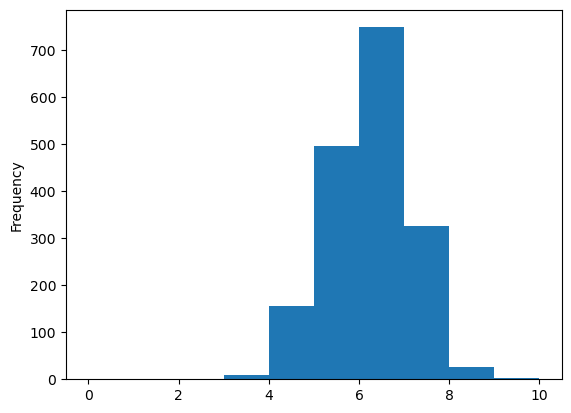

In [22]:
all_rois_df.query("cluster_is_valid == True").cluster_neighbor_count.plot(kind="hist", bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

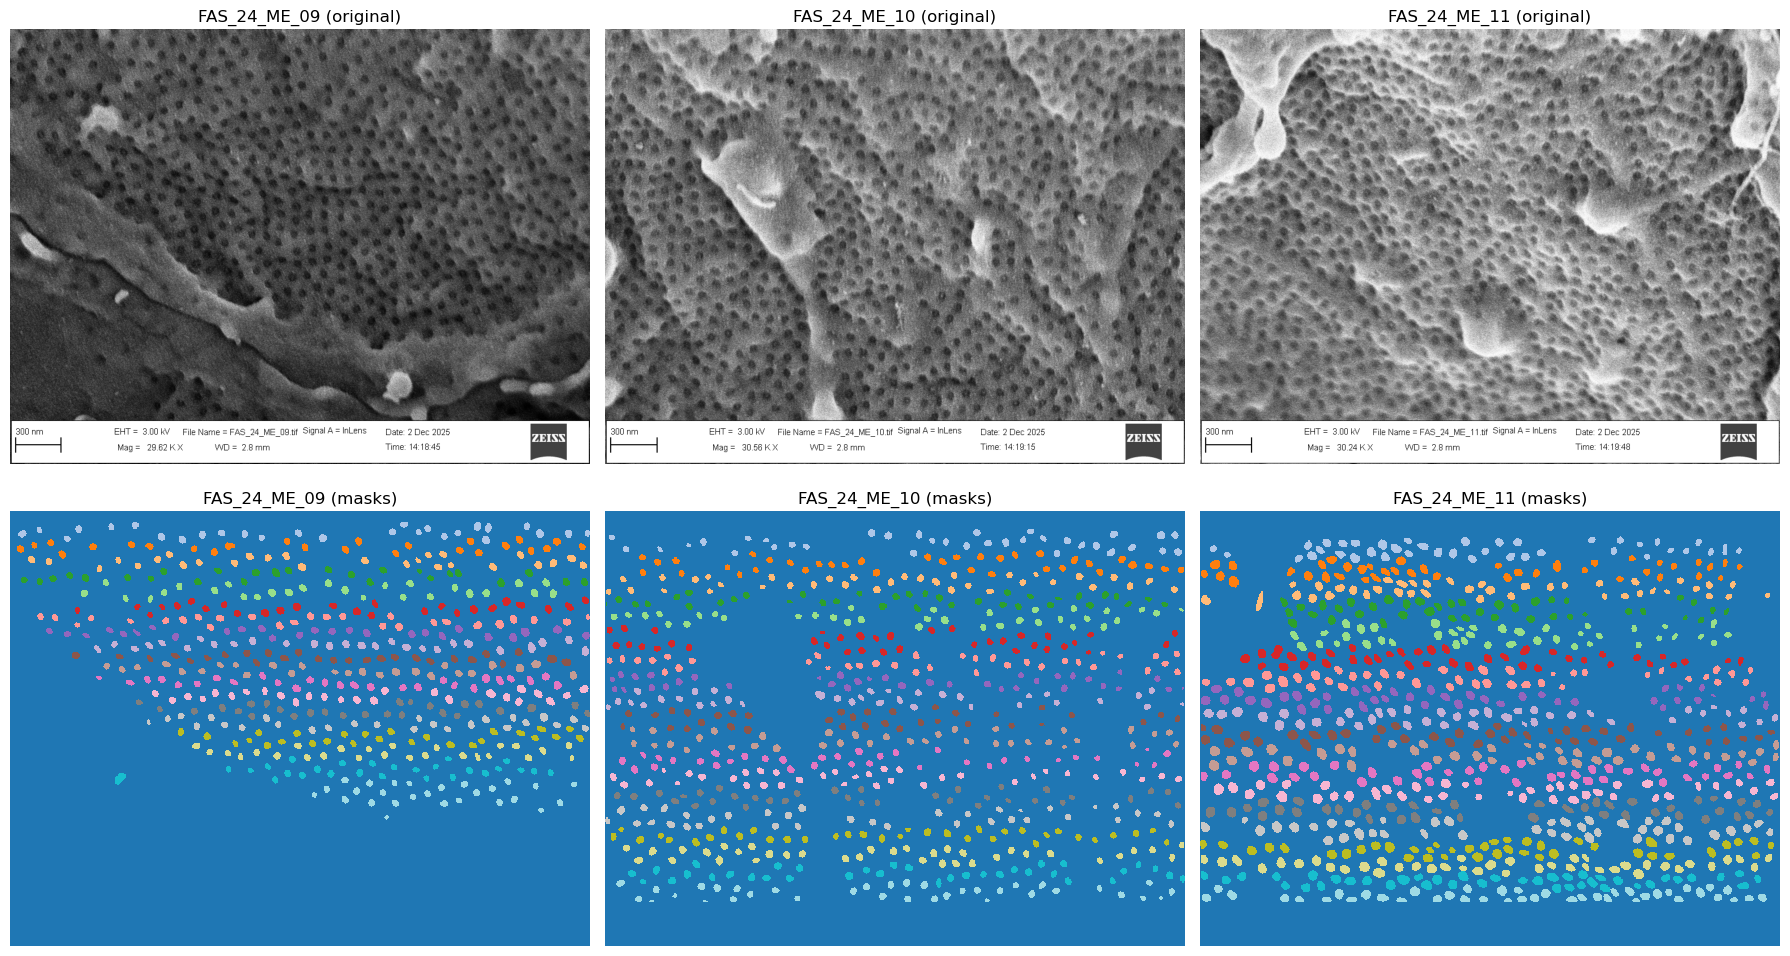

In [35]:
# Display all three original TIFF images and their masks side by side
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for col, stub in enumerate(stubs):
    # Top row: original TIFF images
    raw = tifffile.imread(DATAFOLDER / f"{stub}.tif")
    image = raw[0] if raw.ndim > 2 else raw
    axes[0, col].imshow(image, cmap="gray")
    axes[0, col].set_title(f"{stub} (original)")
    axes[0, col].axis("off")
    
    # Bottom row: ROI masks
    payload, masks = load_segmentation(DATAFOLDER, stub)
    axes[1, col].imshow(masks, cmap="tab20", interpolation="nearest")
    axes[1, col].set_title(f"{stub} (masks)")
    axes[1, col].axis("off")

plt.tight_layout()
plt.show()

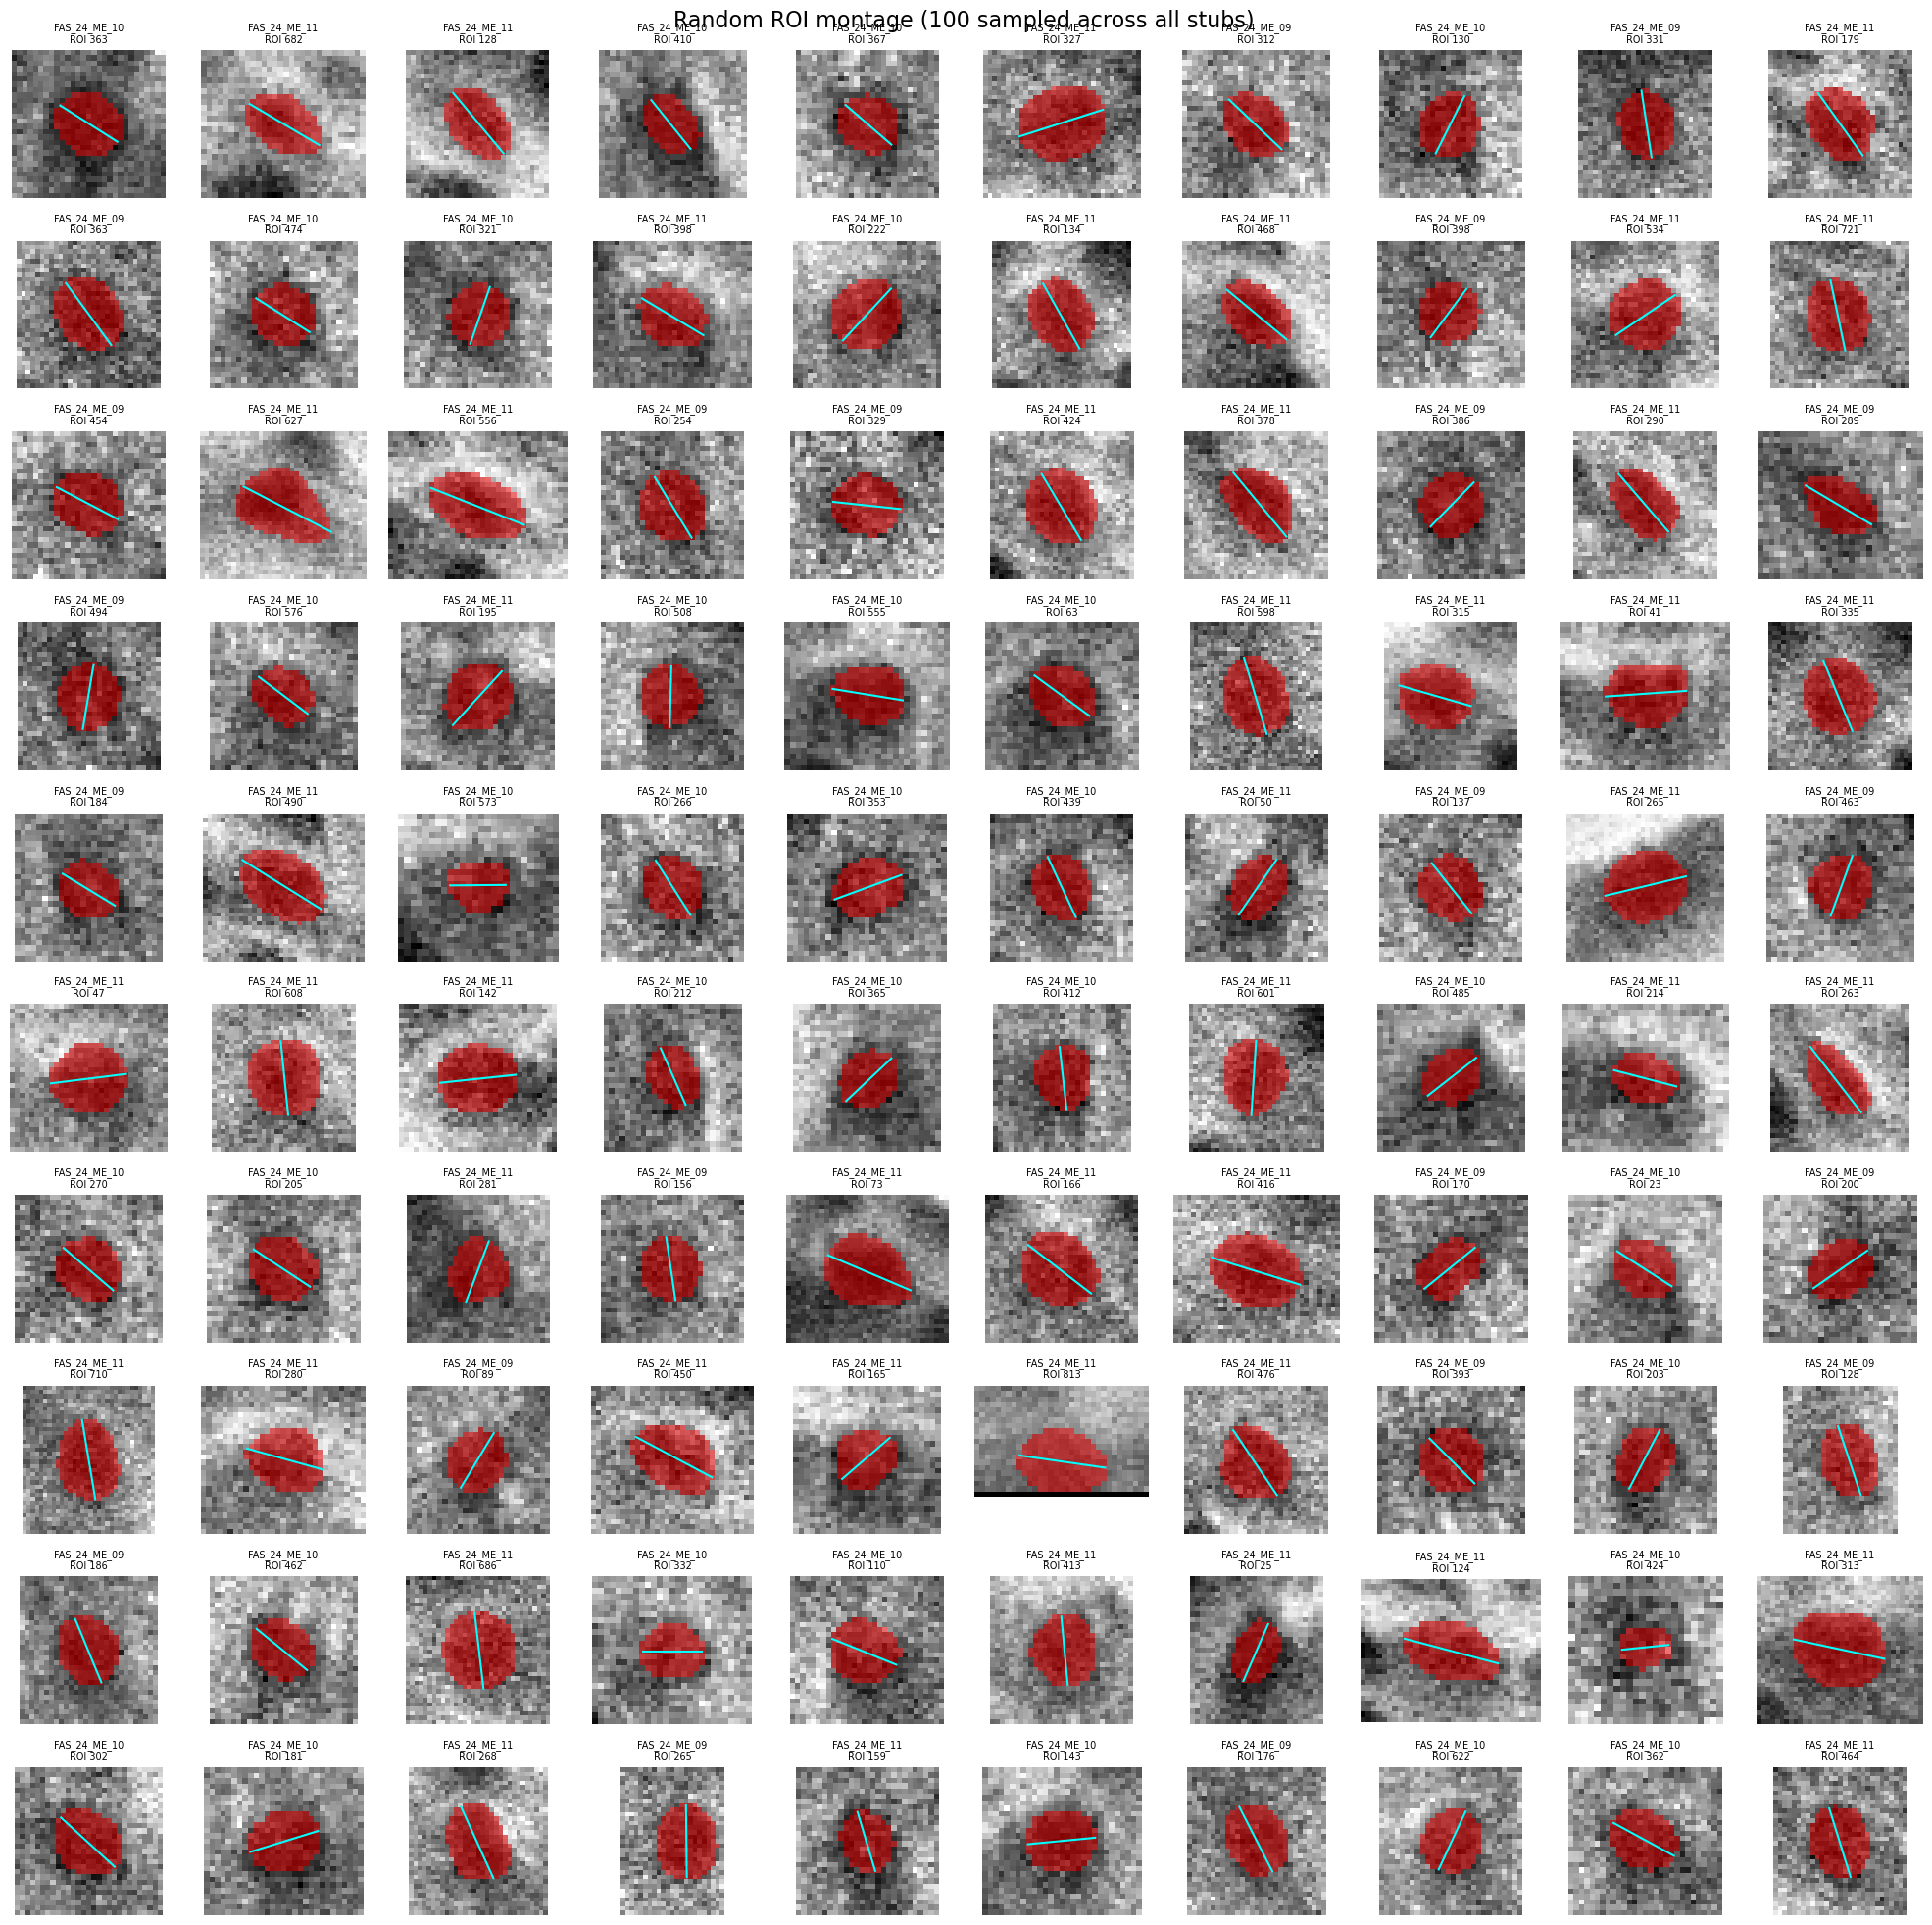

In [7]:
# Random ROI montage across all files: 10x10 grid with mask overlay + major axis
rng_seed = 42  # set to None for non-reproducible sampling
n_rows, n_cols = 10, 10
n_show = n_rows * n_cols
margin = 8

if "all_rois_df" not in globals() or all_rois_df is None or all_rois_df.empty:
    raise ValueError("Run the batch cell first so all_rois_df is available")

required_cols = {"stub", "roi_id"}
missing_cols = required_cols - set(all_rois_df.columns)
if missing_cols:
    raise ValueError(f"all_rois_df is missing required columns: {missing_cols}")

roi_table = all_rois_df[["stub", "roi_id"]].dropna().copy()
roi_table["roi_id"] = roi_table["roi_id"].astype(int)
roi_table = roi_table.drop_duplicates().reset_index(drop=True)

if roi_table.empty:
    raise ValueError("No ROIs available to plot")

n_pick = min(n_show, len(roi_table))
rng = np.random.default_rng(rng_seed)
sel_idx = rng.choice(len(roi_table), size=n_pick, replace=False)
selected = roi_table.iloc[sel_idx].reset_index(drop=True)

# Cache image + masks per stub to avoid repeated I/O
cache = {}
for stub in selected["stub"].unique():
    payload, masks = load_segmentation(DATAFOLDER, stub)
    raw = tifffile.imread(DATAFOLDER / f"{stub}.tif")
    image = raw[0] if raw.ndim > 2 else raw
    cache[stub] = {"image": image, "masks": masks}

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.ravel()

for i, ax in enumerate(axes):
    if i >= n_pick:
        ax.axis("off")
        continue

    stub = selected.loc[i, "stub"]
    roi_id = int(selected.loc[i, "roi_id"])

    image = cache[stub]["image"]
    masks = cache[stub]["masks"]
    roi_mask = masks == roi_id

    ys, xs = np.nonzero(roi_mask)
    if ys.size < 2:
        ax.axis("off")
        continue

    # Crop around ROI for visibility
    x_min, x_max = xs.min(), xs.max()
    y_min, y_max = ys.min(), ys.max()

    x0 = max(0, x_min - margin)
    x1 = min(image.shape[1], x_max + margin + 1)
    y0 = max(0, y_min - margin)
    y1 = min(image.shape[0], y_max + margin + 1)

    img_crop = image[y0:y1, x0:x1]
    mask_crop = roi_mask[y0:y1, x0:x1]

    # Major axis from PCA of ROI pixel coordinates
    coords = np.column_stack((xs, ys)).astype(float)
    center = coords.mean(axis=0)
    centered = coords - center
    cov = np.cov(centered, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov)
    major_vec = eigvecs[:, np.argmax(eigvals)]

    # Endpoints using min/max projection along major axis
    proj = centered @ major_vec
    p0 = center + proj.min() * major_vec
    p1 = center + proj.max() * major_vec

    # Convert to crop coordinates
    p0x, p0y = p0[0] - x0, p0[1] - y0
    p1x, p1y = p1[0] - x0, p1[1] - y0

    ax.imshow(img_crop, cmap="gray")
    ax.imshow(np.ma.masked_where(~mask_crop, mask_crop), cmap="autumn", alpha=0.5)
    ax.plot([p0x, p1x], [p0y, p1y], color="cyan", linewidth=1.5)

    ax.set_title(f"{stub}\nROI {roi_id}", fontsize=7)
    ax.axis("off")

fig.suptitle(f"Random ROI montage ({n_pick} sampled across all stubs)", fontsize=16)
plt.tight_layout()
plt.show()

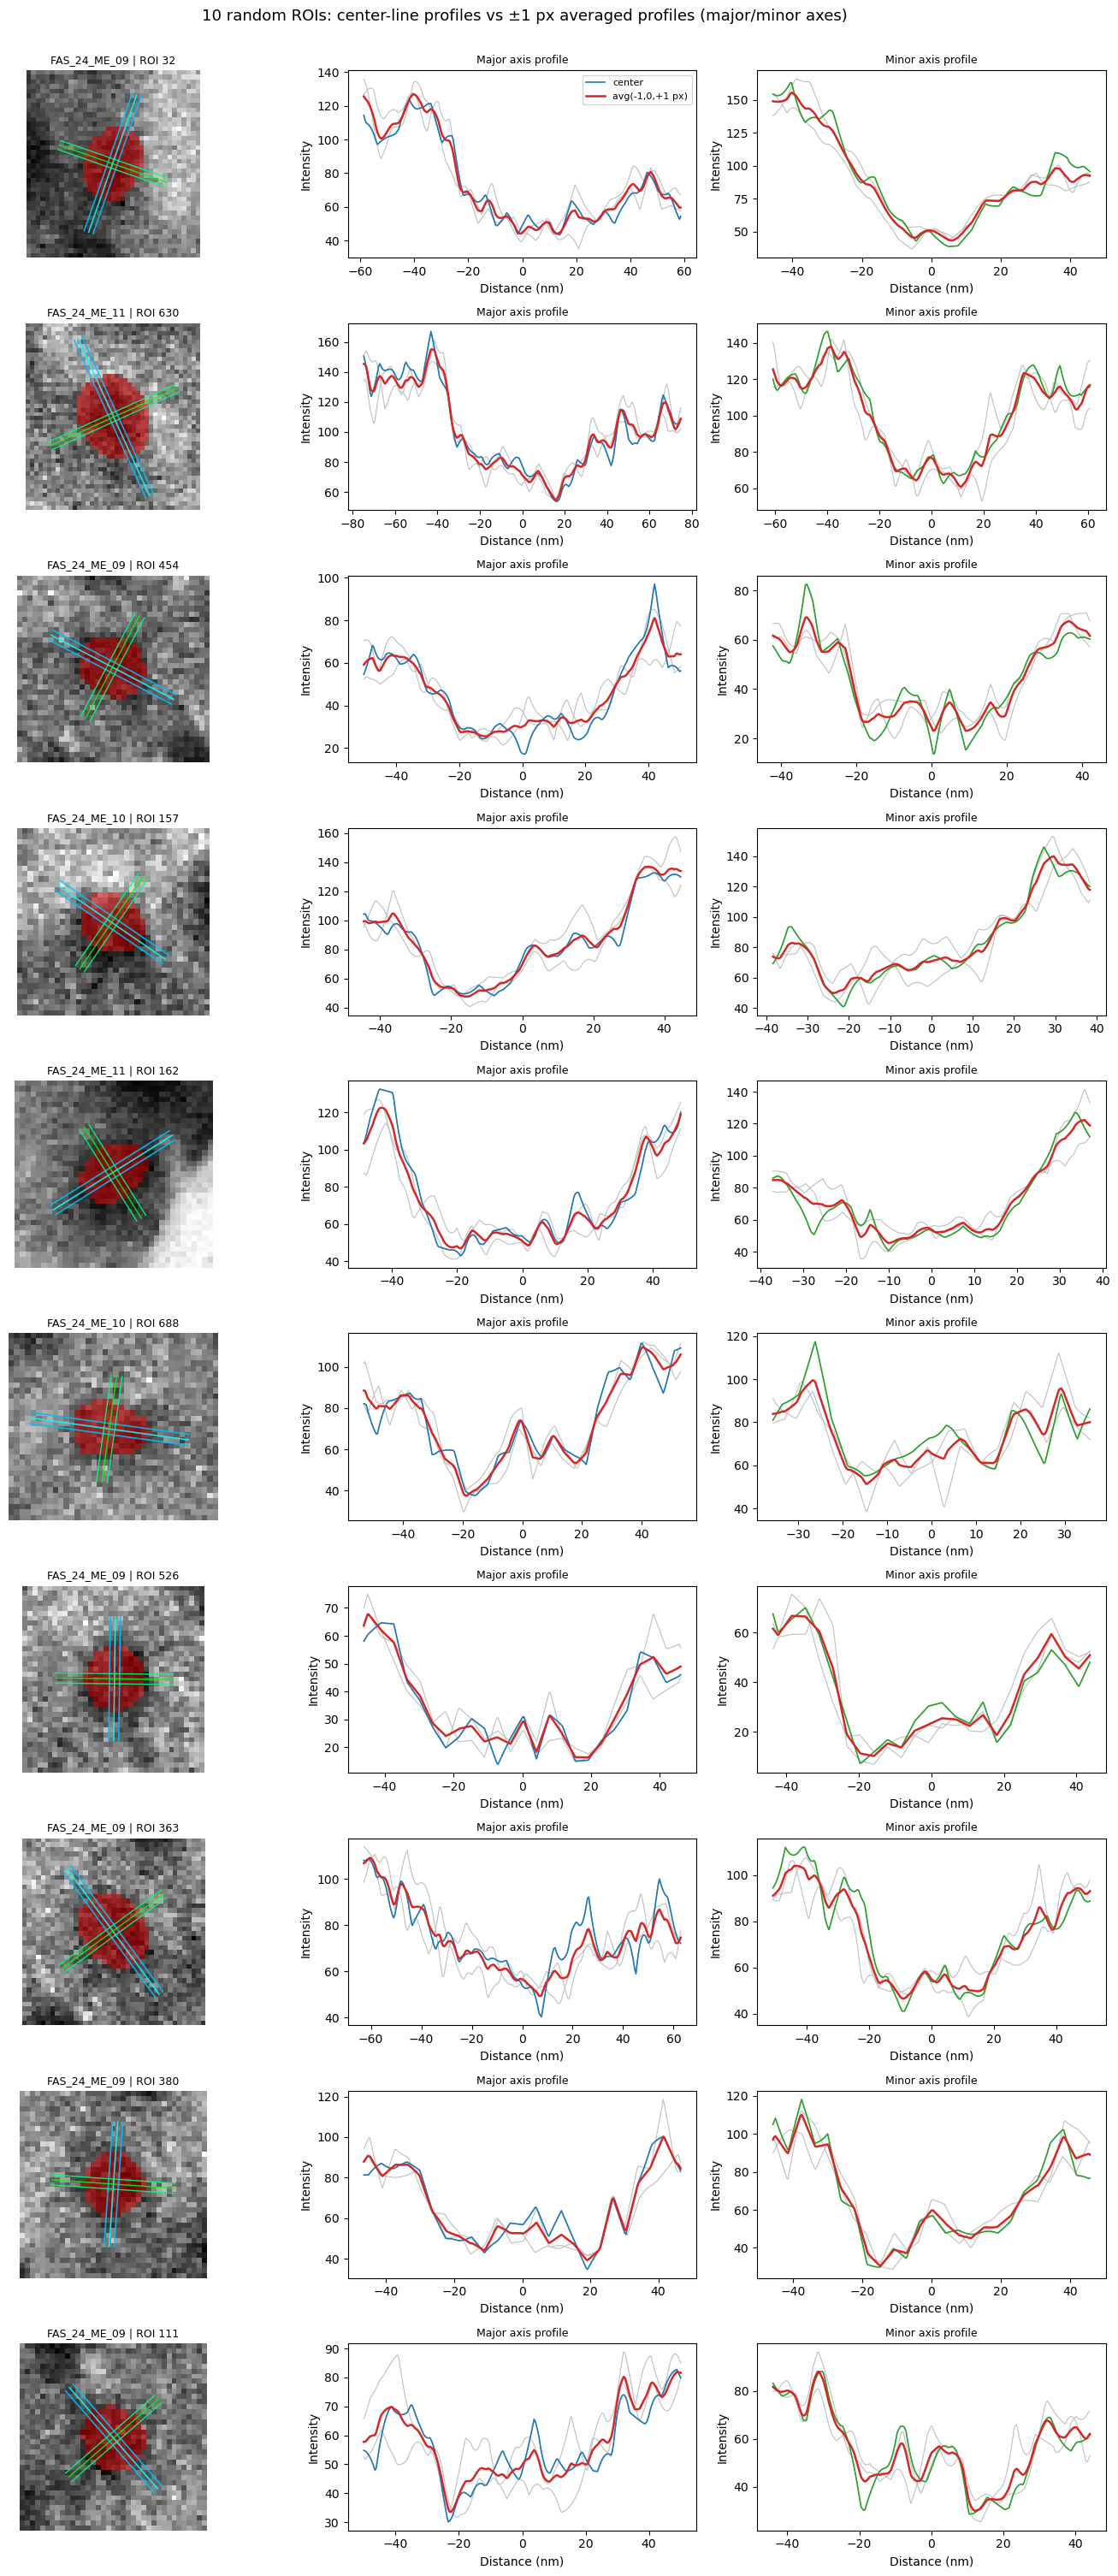

In [29]:
# Compare center-line vs ±1 px averaged profiles on major/minor axes for 10 random ROIs
import builtins

random_seed = 123
n_rois = 10
num_samples = 256
extension_factor = 1.00  # extend line beyond ROI half-length by 100% (50% more than before)
offset_pixels = 1.0       # offsets: [-1, 0, +1] pixels

if "all_rois_df" not in globals() or all_rois_df is None or all_rois_df.empty:
    raise ValueError("Run the batch cell first so all_rois_df is available")

roi_table = all_rois_df[["stub", "roi_id"]].dropna().copy()
roi_table["roi_id"] = roi_table["roi_id"].astype(int)
roi_table = roi_table.drop_duplicates().reset_index(drop=True)
if roi_table.empty:
    raise ValueError("No ROIs found in all_rois_df")


def bilinear_sample(image_2d, x, y):
    h, w = image_2d.shape

    x0 = np.floor(x).astype(int)
    y0 = np.floor(y).astype(int)
    x1 = x0 + 1
    y1 = y0 + 1

    valid = (x0 >= 0) & (x1 < w) & (y0 >= 0) & (y1 < h)
    out = np.full_like(x, np.nan, dtype=float)
    if not np.any(valid):
        return out

    xv = x[valid]
    yv = y[valid]
    x0v = x0[valid]
    y0v = y0[valid]
    x1v = x1[valid]
    y1v = y1[valid]

    wx = xv - x0v
    wy = yv - y0v

    v00 = image_2d[y0v, x0v]
    v10 = image_2d[y0v, x1v]
    v01 = image_2d[y1v, x0v]
    v11 = image_2d[y1v, x1v]

    out_valid = (
        (1 - wx) * (1 - wy) * v00
        + wx * (1 - wy) * v10
        + (1 - wx) * wy * v01
        + wx * wy * v11
    )
    out[valid] = out_valid
    return out


def axis_from_mask(roi_mask):
    ys, xs = np.nonzero(roi_mask)
    if xs.size < 5:
        return None

    coords = np.column_stack((xs, ys)).astype(float)
    center = coords.mean(axis=0)
    centered = coords - center

    cov = np.cov(centered, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = np.argsort(eigvals)[::-1]

    major_vec = eigvecs[:, order[0]]
    major_vec = major_vec / np.linalg.norm(major_vec)
    minor_vec = np.array([-major_vec[1], major_vec[0]])

    proj_major = centered @ major_vec
    proj_minor = centered @ minor_vec

    major_half = builtins.max(abs(proj_major.min()), abs(proj_major.max()))
    minor_half = builtins.max(abs(proj_minor.min()), abs(proj_minor.max()))

    if major_half <= 0 or minor_half <= 0:
        return None

    return center, major_vec, minor_vec, major_half, minor_half


def sample_axis_family(
    image_2d,
    center_xy,
    axis_vec,
    perp_vec,
    half_extent,
    nsamples,
    ext_factor,
    offsets,
    pixel_size_nm,
):
    half_len = half_extent * (1 + ext_factor)
    t = np.linspace(-half_len, half_len, nsamples)  # pixel units
    x_nm = t * pixel_size_nm  # already in nm

    profiles = []
    lines = []
    for off in offsets:
        line_center = center_xy + off * perp_vec
        x = line_center[0] + t * axis_vec[0]
        y = line_center[1] + t * axis_vec[1]
        p = bilinear_sample(image_2d, x, y)
        profiles.append(p)
        lines.append((x, y))

    profiles = np.vstack(profiles)
    center_profile = profiles[len(offsets) // 2]
    mean_profile = np.nanmean(profiles, axis=0)
    return center_profile, mean_profile, profiles, lines, x_nm


rng = np.random.default_rng(random_seed)
n_pick = builtins.min(n_rois, len(roi_table))
sel_idx = rng.choice(len(roi_table), size=n_pick, replace=False)
selected = roi_table.iloc[sel_idx].reset_index(drop=True)

cache = {}
for stub in selected["stub"].unique():
    payload, masks = load_segmentation(DATAFOLDER, stub)
    raw = tifffile.imread(DATAFOLDER / f"{stub}.tif")
    image = raw[0] if raw.ndim > 2 else raw
    pixel_size_nm = get_pixel_size(DATAFOLDER, stub)
    cache[stub] = {"image": image, "masks": masks, "pixel_size_nm": pixel_size_nm}

offsets = np.array([-offset_pixels, 0.0, offset_pixels], dtype=float)

fig, axes = plt.subplots(n_pick, 3, figsize=(14, 3.0 * n_pick))
if n_pick == 1:
    axes = np.array([axes])

for row_idx, (_, row) in enumerate(selected.iterrows()):
    stub = row["stub"]
    roi_id = int(row["roi_id"])

    image = cache[stub]["image"]
    masks = cache[stub]["masks"]
    pixel_size_nm = cache[stub]["pixel_size_nm"]
    roi_mask = masks == roi_id

    out = axis_from_mask(roi_mask)
    if out is None:
        for c in range(3):
            axes[row_idx, c].axis("off")
        continue

    center_xy, major_vec, minor_vec, major_half, minor_half = out

    major_center, major_mean, major_stack, major_lines, x_major_nm = sample_axis_family(
        image_2d=image,
        center_xy=center_xy,
        axis_vec=major_vec,
        perp_vec=minor_vec,
        half_extent=major_half,
        nsamples=num_samples,
        ext_factor=extension_factor,
        offsets=offsets,
        pixel_size_nm=pixel_size_nm,
    )

    minor_center, minor_mean, minor_stack, minor_lines, x_minor_nm = sample_axis_family(
        image_2d=image,
        center_xy=center_xy,
        axis_vec=minor_vec,
        perp_vec=major_vec,
        half_extent=minor_half,
        nsamples=num_samples,
        ext_factor=extension_factor,
        offsets=offsets,
        pixel_size_nm=pixel_size_nm,
    )

    ys, xs = np.nonzero(roi_mask)
    margin = 12
    x0 = builtins.max(0, xs.min() - margin)
    x1 = builtins.min(image.shape[1], xs.max() + margin + 1)
    y0 = builtins.max(0, ys.min() - margin)
    y1 = builtins.min(image.shape[0], ys.max() + margin + 1)

    img_crop = image[y0:y1, x0:x1]
    mask_crop = roi_mask[y0:y1, x0:x1]

    ax_img = axes[row_idx, 0]
    ax_img.imshow(img_crop, cmap="gray")
    ax_img.imshow(np.ma.masked_where(~mask_crop, mask_crop), cmap="autumn", alpha=0.45)

    for line_idx, (x, y) in enumerate(major_lines):
        color = "cyan" if line_idx == 1 else "deepskyblue"
        ax_img.plot(x - x0, y - y0, color=color, linewidth=1.2, alpha=0.9)

    for line_idx, (x, y) in enumerate(minor_lines):
        color = "lime" if line_idx == 1 else "springgreen"
        ax_img.plot(x - x0, y - y0, color=color, linewidth=1.0, alpha=0.9)

    ax_img.set_title(f"{stub} | ROI {roi_id}", fontsize=9)
    ax_img.axis("off")

    ax_maj = axes[row_idx, 1]
    for p in major_stack:
        ax_maj.plot(x_major_nm, p, color="0.75", linewidth=0.8)
    ax_maj.plot(x_major_nm, major_center, color="tab:blue", linewidth=1.2, label="center")
    ax_maj.plot(x_major_nm, major_mean, color="tab:red", linewidth=1.8, label="avg(-1,0,+1 px)")
    ax_maj.set_title("Major axis profile", fontsize=9)
    ax_maj.set_xlabel("Distance (nm)")
    ax_maj.set_ylabel("Intensity")
    if row_idx == 0:
        ax_maj.legend(loc="best", fontsize=8)

    ax_min = axes[row_idx, 2]
    for p in minor_stack:
        ax_min.plot(x_minor_nm, p, color="0.75", linewidth=0.8)
    ax_min.plot(x_minor_nm, minor_center, color="tab:green", linewidth=1.2, label="center")
    ax_min.plot(x_minor_nm, minor_mean, color="tab:red", linewidth=1.8, label="avg(-1,0,+1 px)")
    ax_min.set_title("Minor axis profile", fontsize=9)
    ax_min.set_xlabel("Distance (nm)")
    ax_min.set_ylabel("Intensity")

fig.suptitle(
    "10 random ROIs: center-line profiles vs ±1 px averaged profiles (major/minor axes)",
    fontsize=13,
    y=1.002,
)
plt.tight_layout()
plt.show()

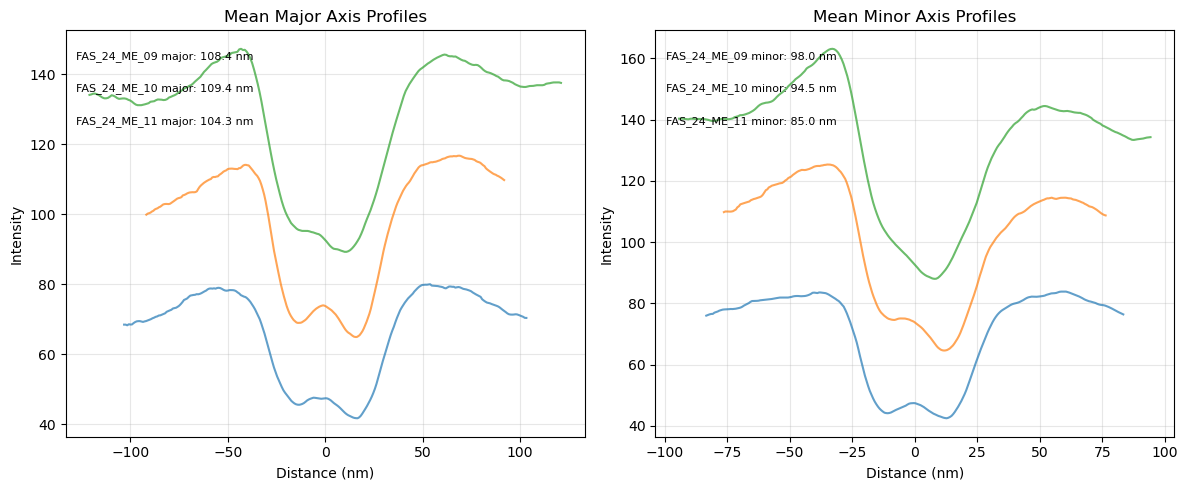

In [ ]:
f, ax = plt.subplots(ncols=2, figsize=(12, 5))

for idx, row in all_summary_df.iterrows():
    stub = row['stub']
    pixel_size_nm = row.get('mean_pixel_size_nm_per_px', np.nan)
    if np.isnan(pixel_size_nm):
        # Fallback: try to get from any rois_df row with this stub
        stub_rows = all_rois_df[all_rois_df['stub'] == stub]
        if not stub_rows.empty:
            pixel_size_nm = stub_rows.iloc[0]['pixel_size']
    
    major = row['mean_profile_major_smpls']
    minor = row['mean_profile_minor_smpls']

    major_diam_nm = row.get('mean_diameter_major_nm', np.nan)
    minor_diam_nm = row.get('mean_diameter_minor_nm', np.nan)

    # Estimate mean sampling step (nm) per stub using ROI-level step columns
    stub_rows = all_rois_df[all_rois_df['stub'] == stub]
    step_major_nm = np.nan
    step_minor_nm = np.nan
    if not stub_rows.empty:
        if 'step_major' in stub_rows.columns:
            step_major_nm = float(np.nanmean(stub_rows['step_major'].to_numpy(dtype=float))) * pixel_size_nm
        if 'step_minor' in stub_rows.columns:
            step_minor_nm = float(np.nanmean(stub_rows['step_minor'].to_numpy(dtype=float))) * pixel_size_nm

    # Fallback to 1 pixel step in nm if unavailable
    if not np.isfinite(step_major_nm):
        step_major_nm = pixel_size_nm
    if not np.isfinite(step_minor_nm):
        step_minor_nm = pixel_size_nm

    # Center x-axis at 0 nm
    x_major_nm = (np.arange(len(major)) - (len(major) - 1) / 2.0) * step_major_nm
    x_minor_nm = (np.arange(len(minor)) - (len(minor) - 1) / 2.0) * step_minor_nm
    
    # Plot major axis
    ax[0].plot(x_major_nm, major, label=f"{stub}", alpha=0.7)
    if np.isfinite(major_diam_nm):
        ax[0].text(0.02, 0.95 - idx*0.08, f"{stub} major: {major_diam_nm:.1f} nm", 
                   transform=ax[0].transAxes, fontsize=8, verticalalignment='top')
    
    # Plot minor axis
    ax[1].plot(x_minor_nm, minor, label=f"{stub}", alpha=0.7)
    if np.isfinite(minor_diam_nm):
        ax[1].text(0.02, 0.95 - idx*0.08, f"{stub} minor: {minor_diam_nm:.1f} nm", 
                   transform=ax[1].transAxes, fontsize=8, verticalalignment='top')

ax[0].set_title("Mean Major Axis Profiles")
ax[0].set_ylabel("Intensity")
ax[0].set_xlabel("Distance (nm)")
ax[0].grid(True, alpha=0.3)

ax[1].set_title("Mean Minor Axis Profiles")
ax[1].set_ylabel("Intensity")
ax[1].set_xlabel("Distance (nm)")
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

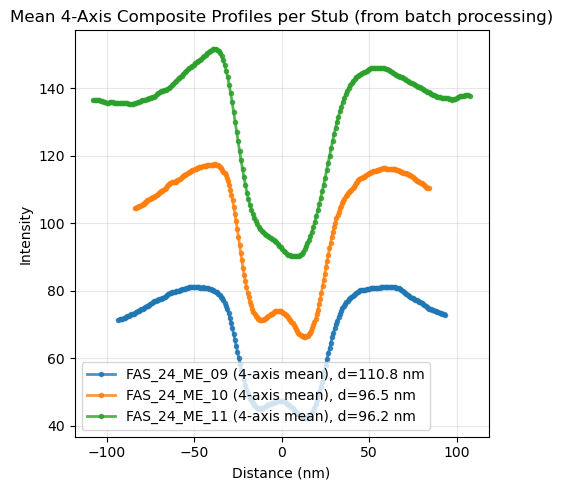

In [ ]:
# Plot mean 4-axis profiles from batch results
if "all_summary_df" not in globals() or all_summary_df is None or all_summary_df.empty:
    raise ValueError("Run the batch cell first so all_summary_df is available")

# Filter rows that have 4-axis profiles
rows_with_profiles = all_summary_df[
    all_summary_df["mean_four_axis_smpls"].notna() & 
    (all_summary_df["mean_four_axis_smpls"].apply(lambda x: x is not None and len(x) > 0 if isinstance(x, (list, np.ndarray)) else False))
].copy()

if rows_with_profiles.empty:
    print("No 4-axis profiles available in summary")
else:
    fig, ax = plt.subplots(figsize=(5, 5))
    
    for idx, (_, row) in enumerate(rows_with_profiles.iterrows()):
        stub = row['stub']
        profile = row['mean_four_axis_smpls']
        
        if profile is None or len(profile) == 0:
            continue

        pixel_size_nm = row.get('mean_pixel_size_nm_per_px', np.nan)
        stub_rows = all_rois_df[all_rois_df['stub'] == stub]

        # Approximate 4-axis step using ROI-level major/minor step means
        step_nm = np.nan
        if not stub_rows.empty and np.isfinite(pixel_size_nm):
            step_vals = []
            if 'step_major' in stub_rows.columns:
                step_vals.append(float(np.nanmean(stub_rows['step_major'].to_numpy(dtype=float))))
            if 'step_minor' in stub_rows.columns:
                step_vals.append(float(np.nanmean(stub_rows['step_minor'].to_numpy(dtype=float))))
            if step_vals:
                step_nm = float(np.nanmean(step_vals)) * pixel_size_nm

        if not np.isfinite(step_nm):
            step_nm = pixel_size_nm if np.isfinite(pixel_size_nm) else 1.0

        four_axis_diam_nm = row.get('mean_diameter_four_axis_nm', np.nan)
        label = f"{stub} (4-axis mean)"
        if np.isfinite(four_axis_diam_nm):
            label = f"{label}, d={four_axis_diam_nm:.1f} nm"

        x_nm = (np.arange(len(profile)) - (len(profile) - 1) / 2.0) * step_nm
        ax.plot(x_nm, profile, linewidth=2, label=label, marker='o', markersize=3, alpha=0.8)
    
    ax.set_title("Mean 4-Axis Composite Profiles per Stub (from batch processing)", fontsize=12)
    ax.set_xlabel("Distance (nm)")
    ax.set_ylabel("Intensity")
    ax.legend(loc="best", fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
